<a href="https://colab.research.google.com/github/Ehsan1997/ObjectDetection-FRCNN-YOLO-Retina/blob/master/Retinanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some preprocessing stuff

In [1]:
zip_path = '/content/drive/My Drive/Datasets/SIMS-dataset.zip'
!unzip '$zip_path' -d ./data/
!unzip -q 'data/SIMS dataset/images.zip' -d data/
!unzip -q 'data/SIMS dataset/Annotations_in_3_formats.zip' -d data

Archive:  /content/drive/My Drive/Datasets/SIMS-dataset.zip
  inflating: ./data/SIMS dataset/test.txt  
  inflating: ./data/SIMS dataset/validation.txt  
  inflating: ./data/SIMS dataset/training.txt  
  inflating: ./data/SIMS dataset/Assignment-2_modified scope.pdf  
  inflating: ./data/SIMS dataset/Annotations_in_3_formats.zip  
  inflating: ./data/SIMS dataset/images.zip  


In [0]:
import os, csv, PIL

def create_csv(txt_path, output_path, class_mapping):
  """
  Creates a csv file that can be used with keras-retinanet csv generator
  (Dependencies: [os, csv, PIL])
  """
  # A subfunction to read annotations file
  def read_ann(ann_path):
    with open(ann_path, 'r') as f:
      lines = f.readlines()
    return lines

  # A subfunction to convert percentage centre 
  # co-ordinates to x1, y1, x2, y2 absolute co-ordinates
  def get_abs_coord(coords, im_w, im_h):
    n_coords = coords.copy()
    n_coords[0] = (coords[0] - (coords[2]/2)) * im_w
    n_coords[2] = n_coords[0] + (coords[2] * im_w)
    n_coords[1] = (coords[1] - (coords[3]/2)) * im_h
    n_coords[3] = n_coords[1] + (coords[3] * im_h)

    return list(map(int, n_coords))

  # Class ID to name mapping
  id_to_name = class_mapping

  # create_csv continues.
  # A bit of mangling with the path
  root = txt_path.split('/')[0]
  # CSV list to keep track of the lines needed to be written to the csv
  csv_list = []
  with open(txt_path, 'r') as f:
    line = f.readline()
    while line:
      # Get images path
      im_path = line.strip()
      abs_im_path = root + '/' + "/".join(line.strip().split('/')[1:])
      # Get path of annotations for the image
      im_txt_path = os.path.splitext(abs_im_path)[0] + '.txt'
      # Get the annotations
      anns = read_ann(im_txt_path)
      for ann in anns:
        items = ann.strip().split(' ')
        c_id, bb = int(items[0]), list(map(float, items[1:]))
        # Get the size of the image
        w, h = PIL.Image.open(abs_im_path).size
        # Get absolute co-ordinates
        bb = get_abs_coord(bb, w, h)
        # Row for csv file, converting x,y,w,h to x,y,x1, y1
        csv_list.append([im_path, *bb, id_to_name[c_id]])
      # Read next line
      line = f.readline()

    with open(output_path, 'w', newline="") as f:
      writer = csv.writer(f)
      writer.writerows(csv_list)
        

In [17]:
class_mapping = ['Car', 'Truck', 'Van', 'LongVehicle', 'Bus', 
                'Airliner', 'Propeller Aircraft', 'Trainer Aircraft', 'Chartered Aircraft',
                'Fighter Aircraft', 'Others', 'Stair Truck', 'Pushback Truck',
                'Helicopter', 'Boat']
class_mapping = dict(enumerate(class_mapping))

create_csv('data/SIMS dataset/training.txt', 'data/training.csv', class_mapping)
create_csv('data/SIMS dataset/test.txt', 'data/test.csv', class_mapping)
create_csv('data/SIMS dataset/validation.txt', 'data/validation.csv', class_mapping)

class_csv = list(map(lambda x: (x[1], x[0]), class_mapping.items()))

with open('data/classes.csv', 'w', newline="") as f:
  writer = csv.writer(f)
  writer.writerows(class_csv)

NameError: ignored

In [4]:
!git clone https://github.com/fizyr/keras-retinanet
!pip install ./keras-retinanet/
!mv keras-retinanet/* .
!rm -r keras-retinanet
!python setup.py build_ext --inplace

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 5711 (delta 0), reused 1 (delta 0), pack-reused 5705
Receiving objects: 100% (5711/5711), 13.37 MiB | 29.43 MiB/s, done.
Resolving deltas: 100% (3831/3831), done.
Processing ./keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170129 sha256=d2f4e210b908da71ef8c09148706cf8bd49097ae3009b859d6eea6400393afa3
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=99267430140c951f5d16ddc1fba9b69e09fb4095749711ba6b4cd137846655e9
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet
running build_ext
cytho

In [7]:
!python keras_retinanet/bin/train.py --gpu 0 csv data/training.csv data/classes.csv --val-annotations data/validation.csv

Using TensorFlow backend.
2020-05-11 19:24:37.187715: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-11 19:24:38.614268: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-11 19:24:38.627039: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-11 19:24:38.627615: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-05-11 19:24:38.627655: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-11 19:24:38.629265: I ten

In [20]:
!python keras_retinanet/bin/train.py --epochs 5 --snapshot-path '/content/drive/My Drive/DeepLearning/ObjectDetection/SavedModels/retina_exp' --gpu 0 csv data/training.csv data/classes.csv --val-annotations data/validation.csv

Using TensorFlow backend.
2020-05-11 21:03:42.033379: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-11 21:03:43.491937: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-11 21:03:43.510111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-11 21:03:43.510716: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-05-11 21:03:43.510759: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-11 21:03:43.512633: I ten

In [4]:
from keras_retinanet.bin import train

args = "--epochs 5 --gpu 0 --snapshot-path".split(" ") + \
           ["/content/drive/My Drive/DeepLearning/ObjectDetection/SavedModels/retina_exp"] + \
           "csv data/training.csv data/classes.csv --val-annotations data/validation.csv".split(" ")
print(args)
history = train.main(args)

['--epochs', '5', '--gpu', '0', '--snapshot-path', '/content/drive/My Drive/DeepLearning/ObjectDetection/SavedModels/retina_exp', 'csv', 'data/training.csv', 'data/classes.csv', '--val-annotations', 'data/validation.csv']
1 Physical GPUs, 1 Logical GPUs
Creating model, this may take a second...
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.62

/content/keras_retinanet/preprocessing/generator.py:181: UserWarning: Image data/./images/0503.jpg with id 680 (shape (768, 1024, 3)) contains the following invalid boxes: [[ -1. 309.  19. 346.]].
  annotations['bboxes'][invalid_indices, :]


 1487/10000 [===>..........................] - ETA: 29:17 - loss: 2.8853 - regression_loss: 2.1479 - classification_loss: 0.7374

/content/keras_retinanet/preprocessing/generator.py:181: UserWarning: Image data/./images/2218.jpg with id 1892 (shape (768, 1024, 3)) contains the following invalid boxes: [[ -3. 177. 110. 306.]].
  annotations['bboxes'][invalid_indices, :]


10000/10000 [==============================] - 2016s 202ms/step - loss: 1.7057 - regression_loss: 1.2612 - classification_loss: 0.4445


Running network: 100% (1741 of 1741) |###| Elapsed Time: 0:03:28 Time:  0:03:28
Parsing annotations: 100% (1741 of 1741) || Elapsed Time: 0:00:00 Time:  0:00:00


11474 instances of class Car with average precision: 0.8118
864 instances of class Truck with average precision: 0.2965
2199 instances of class Van with average precision: 0.4994
381 instances of class LongVehicle with average precision: 0.2577
631 instances of class Bus with average precision: 0.2955
212 instances of class Airliner with average precision: 0.8924
41 instances of class Propeller Aircraft with average precision: 0.1668
141 instances of class Trainer Aircraft with average precision: 0.6229
155 instances of class Chartered Aircraft with average precision: 0.4435
8 instances of class Fighter Aircraft with average precision: 0.0221
190 instances of class Others with average precision: 0.0076
126 instances of class Stair Truck with average precision: 0.0116
68 instances of class Pushback Truck with average precision: 0.0009
16 instances of class Helicopter with average precision: 0.0098
4707 instances of class Boat with average precision: 0.6485
mAP: 0.3325

Epoch 00001: savi

Running network: 100% (1741 of 1741) |###| Elapsed Time: 0:03:15 Time:  0:03:15
Parsing annotations: 100% (1741 of 1741) || Elapsed Time: 0:00:00 Time:  0:00:00


11474 instances of class Car with average precision: 0.8499
864 instances of class Truck with average precision: 0.4899
2199 instances of class Van with average precision: 0.6091
381 instances of class LongVehicle with average precision: 0.2784
631 instances of class Bus with average precision: 0.4162
212 instances of class Airliner with average precision: 0.9595
41 instances of class Propeller Aircraft with average precision: 0.2103
141 instances of class Trainer Aircraft with average precision: 0.9031
155 instances of class Chartered Aircraft with average precision: 0.7091
8 instances of class Fighter Aircraft with average precision: 0.6294
190 instances of class Others with average precision: 0.0131
126 instances of class Stair Truck with average precision: 0.1545
68 instances of class Pushback Truck with average precision: 0.0598
16 instances of class Helicopter with average precision: 0.0386
4707 instances of class Boat with average precision: 0.8310
mAP: 0.4768

Epoch 00002: savi

Running network: 100% (1741 of 1741) |###| Elapsed Time: 0:03:11 Time:  0:03:11
Parsing annotations: 100% (1741 of 1741) || Elapsed Time: 0:00:00 Time:  0:00:00


11474 instances of class Car with average precision: 0.8901
864 instances of class Truck with average precision: 0.6005
2199 instances of class Van with average precision: 0.6994
381 instances of class LongVehicle with average precision: 0.5022
631 instances of class Bus with average precision: 0.6682
212 instances of class Airliner with average precision: 0.9668
41 instances of class Propeller Aircraft with average precision: 0.2582
141 instances of class Trainer Aircraft with average precision: 0.9358
155 instances of class Chartered Aircraft with average precision: 0.8092
8 instances of class Fighter Aircraft with average precision: 0.7290
190 instances of class Others with average precision: 0.0486
126 instances of class Stair Truck with average precision: 0.2840
68 instances of class Pushback Truck with average precision: 0.0767
16 instances of class Helicopter with average precision: 0.1587
4707 instances of class Boat with average precision: 0.9255
mAP: 0.5702

Epoch 00003: savi

Running network: 100% (1741 of 1741) |###| Elapsed Time: 0:03:10 Time:  0:03:10
Parsing annotations: 100% (1741 of 1741) || Elapsed Time: 0:00:00 Time:  0:00:00


11474 instances of class Car with average precision: 0.8957
864 instances of class Truck with average precision: 0.6116
2199 instances of class Van with average precision: 0.7276
381 instances of class LongVehicle with average precision: 0.5832
631 instances of class Bus with average precision: 0.7249
212 instances of class Airliner with average precision: 0.9710
41 instances of class Propeller Aircraft with average precision: 0.6044
141 instances of class Trainer Aircraft with average precision: 0.9576
155 instances of class Chartered Aircraft with average precision: 0.8566
8 instances of class Fighter Aircraft with average precision: 0.9750
190 instances of class Others with average precision: 0.1325
126 instances of class Stair Truck with average precision: 0.3384
68 instances of class Pushback Truck with average precision: 0.1448
16 instances of class Helicopter with average precision: 0.2957
4707 instances of class Boat with average precision: 0.9358
mAP: 0.6503

Epoch 00004: savi

Running network: 100% (1741 of 1741) |###| Elapsed Time: 0:03:09 Time:  0:03:09
Parsing annotations: 100% (1741 of 1741) || Elapsed Time: 0:00:00 Time:  0:00:00


11474 instances of class Car with average precision: 0.8824
864 instances of class Truck with average precision: 0.6616
2199 instances of class Van with average precision: 0.7492
381 instances of class LongVehicle with average precision: 0.5333
631 instances of class Bus with average precision: 0.7566
212 instances of class Airliner with average precision: 0.9736
41 instances of class Propeller Aircraft with average precision: 0.7023
141 instances of class Trainer Aircraft with average precision: 0.9673
155 instances of class Chartered Aircraft with average precision: 0.9355
8 instances of class Fighter Aircraft with average precision: 0.9594
190 instances of class Others with average precision: 0.1338
126 instances of class Stair Truck with average precision: 0.3712
68 instances of class Pushback Truck with average precision: 0.1533
16 instances of class Helicopter with average precision: 0.5894
4707 instances of class Boat with average precision: 0.9385
mAP: 0.6872

Epoch 00005: savi

In [17]:
print("--epochs 5 --snapshot-path" +
           " \"/content/drive/My Drive/DeepLearning/ObjectDetection/SavedModels/retina_exp\"" +
           " --gpu 0 csv data/training.csv data/classes.csv --val-annotations data/validation.csv")

--epochs 5 --snapshot-path "/content/drive/My Drive/DeepLearning/ObjectDetection/SavedModels/retina_exp" --gpu 0 csv data/training.csv data/classes.csv --val-annotations data/validation.csv


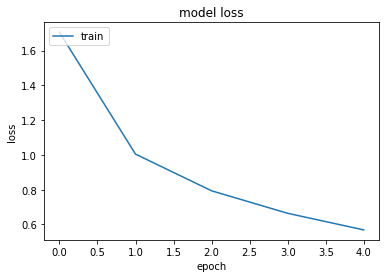

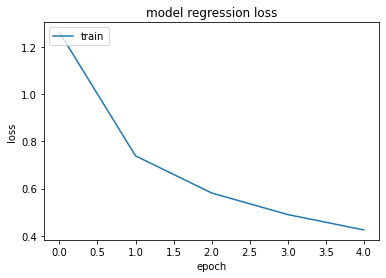

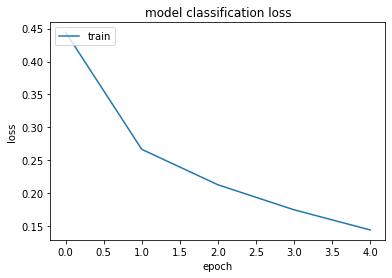

In [5]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['regression_loss'])
plt.title('model regression loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['classification_loss'])
plt.title('model classification loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

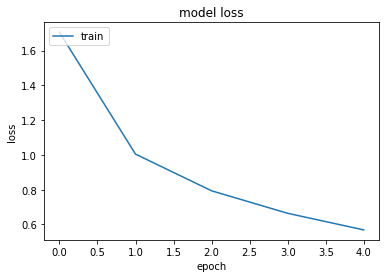

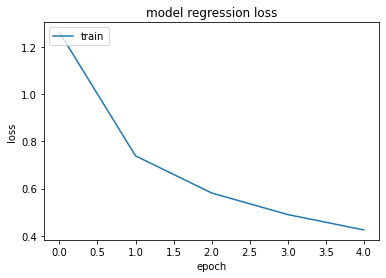

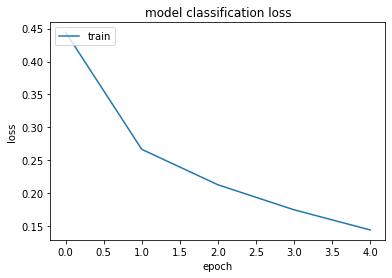

In [6]:
# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['regression_loss'])
plt.title('model regression loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['classification_loss'])
plt.title('model classification loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
# import keras

# model = models.backbone('resnet50').retinanet(num_classes=15)

In [0]:
# import keras_retinanet
# model.compile(
#     loss={
#         'regression'    : keras_retinanet.losses.smooth_l1(),
#         'classification': keras_retinanet.losses.focal()
#     },
#     optimizer=keras.optimizers.adam(lr=1e-4, clipnorm=0.001)
# )

In [38]:
# model.summary()

Model: "retinanet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
padding_conv1 (ZeroPadding2D)   (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        padding_conv1[0][0]              
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________

In [0]:
from keras_retinanet.preprocessing import csv_generator
# TrainGenerator = csv_generator.CSVGenerator('data/training.csv', 'data/classes.csv')
TestGenerator = csv_generator.CSVGenerator('data/test.csv', 'data/classes.csv')
# ValidationGenerator = csv_generator.CSVGenerator('data/validation.csv', 'data/classes.csv')

In [0]:
# steps_per_epoch = len(TrainGenerator)/16

In [41]:
# history = model.fit_generator(TrainGenerator, steps_per_epoch=steps_per_epoch, epochs=30)

Epoch 1/30
 64/202 [========>.....................] - ETA: 1:03 - loss: 2.7003 - regression_loss: 1.9603 - classification_loss: 0.7401

/content/keras_retinanet/preprocessing/generator.py:181: UserWarning: Image data/./images/0503.jpg with id 680 (shape (768, 1024, 3)) contains the following invalid boxes: [[ -1. 309.  19. 346.]].
  annotations['bboxes'][invalid_indices, :]


203/202 [==============================] - 94s 461ms/step - loss: 2.6041 - regression_loss: 1.8843 - classification_loss: 0.7198
Epoch 2/30
203/202 [==============================] - 94s 463ms/step - loss: 2.6249 - regression_loss: 1.8344 - classification_loss: 0.7905
Epoch 3/30
203/202 [==============================] - 94s 463ms/step - loss: 2.4793 - regression_loss: 1.7601 - classification_loss: 0.7192
Epoch 4/30
155/202 [======================>.......] - ETA: 21s - loss: 2.4033 - regression_loss: 1.6869 - classification_loss: 0.7164

/content/keras_retinanet/preprocessing/generator.py:181: UserWarning: Image data/./images/2218.jpg with id 1892 (shape (768, 1024, 3)) contains the following invalid boxes: [[ -3. 177. 110. 306.]].
  annotations['bboxes'][invalid_indices, :]


203/202 [==============================] - 94s 462ms/step - loss: 2.3978 - regression_loss: 1.7042 - classification_loss: 0.6937
Epoch 5/30
203/202 [==============================] - 94s 462ms/step - loss: 2.3957 - regression_loss: 1.6112 - classification_loss: 0.7844
Epoch 6/30
203/202 [==============================] - 94s 463ms/step - loss: 2.3251 - regression_loss: 1.6685 - classification_loss: 0.6566
Epoch 7/30
203/202 [==============================] - 94s 463ms/step - loss: 2.2703 - regression_loss: 1.6195 - classification_loss: 0.6508
Epoch 8/30
203/202 [==============================] - 94s 463ms/step - loss: 2.2270 - regression_loss: 1.4774 - classification_loss: 0.7497
Epoch 9/30
203/202 [==============================] - 94s 463ms/step - loss: 2.1234 - regression_loss: 1.4925 - classification_loss: 0.6310
Epoch 10/30
203/202 [==============================] - 94s 463ms/step - loss: 2.0471 - regression_loss: 1.4471 - classification_loss: 0.6000
Epoch 11/30
203/202 [=========

In [32]:
# model.evaluate_generator(ValidationGenerator, steps_per_epoch, verbose=1)

203/202 [==============================] - 31s 153ms/step


[0.9324739575386047, 1.10347318649292, 0.36324626207351685]

In [0]:
# from keras_retinanet.callbacks.eval import Evaluate

# mAP_callback = Evaluate(ValidationGenerator)
# callbacks = [mAP_callback]

In [0]:
# model.save('m.h5')
# model.save('/content/drive/My Drive/DeepLearning/ObjectDetection/SavedModels/retinanet_temp_model.h5')

In [7]:
!keras_retinanet/bin/convert_model.py '/content/drive/My Drive/DeepLearning/ObjectDetection/SavedModels/retina_exp/resnet50_csv_05.h5' m_i.h5

Using TensorFlow backend.
2020-05-12 01:19:34.678697: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-12 01:19:36.455845: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-12 01:19:36.458264: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-12 01:19:36.458690: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-05-12 01:19:36.458724: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-12 01:19:36.474208: I ten

In [10]:
import os
from keras_retinanet import models

model_path = os.path.join('m_i.h5')

# load retinanet model
model_ = models.load_model(model_path, backbone_name='resnet50')

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [16]:
from keras_retinanet.utils.eval import evaluate

res = evaluate(TestGenerator, model_)
res

Running network: 100% (748 of 748) |#####| Elapsed Time: 0:01:21 Time:  0:01:21
Parsing annotations: 100% (748 of 748) |#| Elapsed Time: 0:00:00 Time:  0:00:00


In [28]:
aps = list(map(lambda x: x[0], res[0].values()))
print("mAP: ", sum(aps)/len(aps))

mAP:  0.6979428428802471


In [0]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

In [0]:
labels_to_names=class_mapping

processing time:  0.07248258590698242


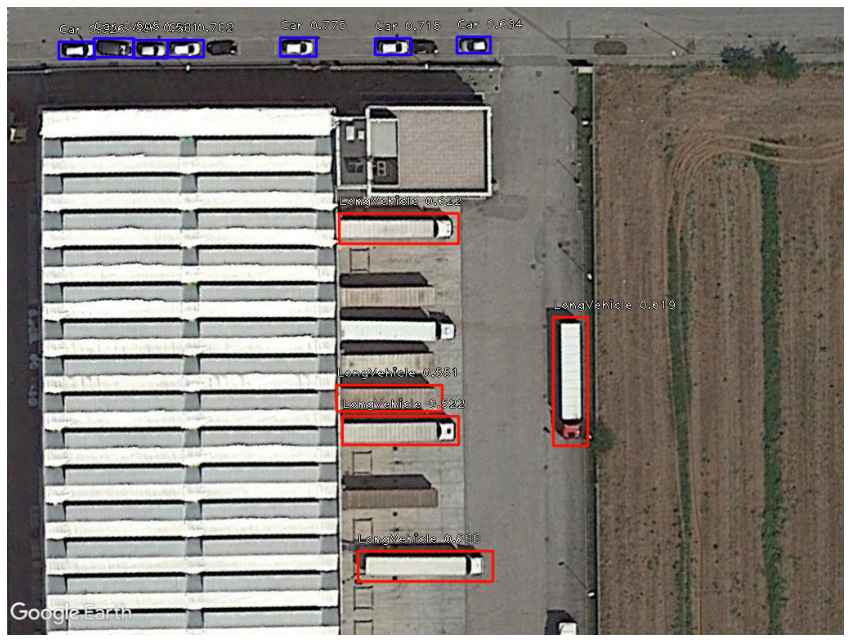

In [35]:
# load image
image = read_image_bgr('data/./images/0810.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model_.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()